170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 93ms/step - accuracy: 0.3513 - loss: 1.7445 - val_accuracy: 0.5699 - val_loss: 1.1903
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6095 - loss: 1.0966 - val_accuracy: 0.6462 - val_loss: 1.0121
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6939 - loss: 0.8702 - val_accuracy: 0.6985 - val_loss: 0.8796
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.7432 - loss: 0.7332 - val_accuracy: 0.7194 - val_loss: 0.7974
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.7778 - loss: 0.6316 - val_accuracy: 0.7225 - val_loss: 0.8286
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.8111 - loss: 0.5409 - val_accuracy: 0.7217 - val_loss: 0.8630
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.8350 - loss: 0.4594 - val_accuracy: 0.7291 - val_loss: 0.8744
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 

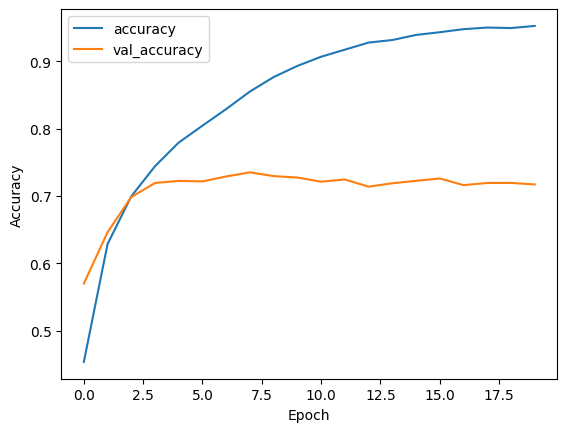

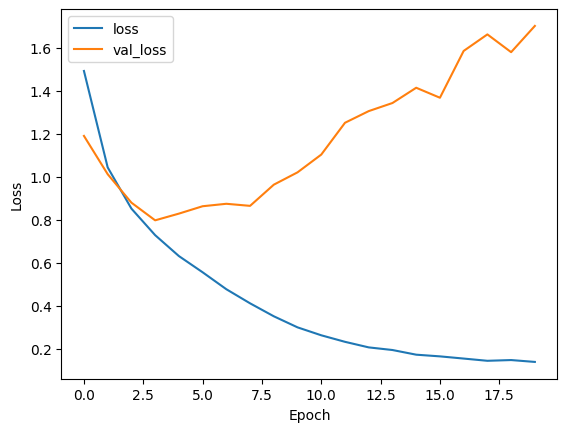

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess CIFAR-10 data (replace this with your actual data loading function)
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images = train_images / 255.0, val_images / 255.0

# Define your modified architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Customize the number of convolutions between downsampling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Customize the number of filters in each layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Customize the initial "patchify" layer
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
The last printed validation accuracy is from Epoch 14: validation loss: 1.024, accuracy: 75.930. The final validation accuracy from your modified model's output: Epoch 20: validation loss: 1.7021, accuracy: 71.72
In this case, the original model's accuracy is higher (75.930%) than your modified model's accuracy (71.72%). Therefore, your modified model did not beat the validation accuracy shown in the original model. 

In [ ]:
The modified network architecture incorporates several key changes to enhance its capacity and potentially boost performance. By increasing the depth with additional convolutional layers, the model can capture more complex patterns. 
The introduction of extra filters in specific layers allows for learning more intricate features at varying levels of abstraction. 
Max pooling layers contribute to downsampling, promoting translation invariance and reducing computational complexity. 
The inclusion of a flattening layer prepares the data for fully connected layers, while additional dense layers augment the model's ability to capture higher-level abstractions. 
These modifications aim to create a deeper and more expressive model, potentially improving its capability to discern subtle patterns and relationships in the input data, ultimately enhancing accuracy on the task at hand. 
Continuous monitoring of the model's performance on validation data is crucial to fine-tune hyperparameters and prevent overfitting.